In [1]:
# on importe les librairies importantes
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Résolution Lab 1 - Partie 1

## 1. Définition des fonctions importantes

### 1.1 Ray tracing matrix

In [2]:
def Mlens(f):
    '''
        Retourne la matrice de tracé de rayon pour une lentille 
        mince ayant une longueur focale f
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

def Mtrans(d):
    '''
        Retourne la matrice de tracé de rayon pour une translation
        d'une distance d 
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

### 1.2 Détermination de la position des 2 plans images limites

Le premier plan image est celui en orange et le deuxième est celui en rose. pointillés orange et rose.

In [3]:
def find_image_planes(f, d, D=25.4e-3):
    '''
        Retourne la position des plans images (orange et rose), qui se retrouvent
        à droite de la lentille à droite
    '''
    dist_orange = f - (d*f)/(D-d) # Position du plan image en orange
    dist_rose = f + (d*f)/(D-d) # Position du plan image en rose
    return dist_orange, dist_rose

### 1.3 Fonction pour créer la matrice du système optique 

Voici les 5 étapes du système de microscopie confocale: 
1. Translation de $x$ ($x$ est notre inconue à trouver)
1. Réfraction par lentille mince courbe $f_1$
1. Translation de $L$
1. Réfraction par lentille mince courbe $f_2$
1. Translation `dist_image`

`dist_image` sont les distances `dist_p1` (plan image orange) et `dist_p2` (plan image en rose) 

In [4]:
def system_matrix(f, L, dist_image):
    '''
        Retourne la matrice de tracé de rayon 2x2 du système de microscopie confocale
        Celle-ci contient l'inconnu 'x' comme variable symbolique
    '''
    x = sp.symbols('x')
    Mtot = Mtrans(dist_image)@Mlens(f)@Mtrans(L)@Mlens(f)@Mtrans(x)
    return Mtot

### 1.4 Fonction de calcul *complet*

Cette fonction calcule le profondeur de champ à partir de tous les paramètres du système.

In [5]:
def compute_dof(f, L, pinhole_size):
    # On trouve la position des deux plans images.
    dist_orange, dist_rose = find_image_planes(f, pinhole_size)
    
    # on trouve la matrice de tracé de rayon pour le plan image en orange
    Msys = system_matrix(f, L, dist_orange)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    B = Msys[0, 1] 
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x1 = sp.solve(B)[0]

    # On trouve la matrice de tracé de rayon pour le plan image en rose.
    Msys = system_matrix(f, L, dist_rose)
    # Même chose que pour le plan image en orange.
    B = Msys[0, 1]
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x2 = sp.solve(B)[0]
    # On calcule la résolution axiale.
    dof = np.abs(x2-x1)
    return dof

# 2. Résultats

### 2.1 Graphique 1: $d$ vs $\delta_z$ pour $L=f$ et $f=f_1=f_2=$ 25, 35, 50, 100 et 100 mm

In [6]:
f = [25e-3,35e-3,50e-3,100e-3,150e-3]  # [m]
pinhole_sizes = [50.0e-6,75.0e-6,100.0e-6,150.0e-6] # [m]
every_dofs = []
for i in range(len(f)):
    dofs = []
    for j in range(len(pinhole_sizes)):
        # On calculate la résolution axiale
        dof = compute_dof(f[i], f[i], pinhole_sizes[j])
        # On ajoute la résolution axiale à une liste contenant les différentes résolutions axiales
        dofs.append(dof)
    # On ajoute les dofs pour une distance d à une liste storant les dofs pour les différents d
    every_dofs.append(dofs)

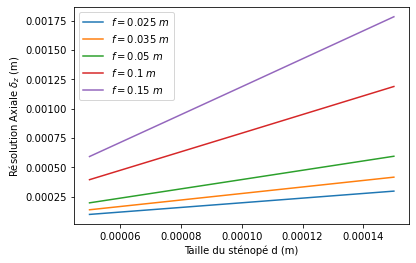

In [7]:
plt.figure()
for i in range(len(f)):
    plt.plot(pinhole_sizes, every_dofs[i], label=f'$f = ${f[i]} $m$')
plt.xlabel('Taille du sténopé d (m)')
plt.ylabel('Résolution Axiale $\delta_z$ (m)')
plt.legend()

### 2.2 Graphique 2: $f$ vs $\delta_z$ pour $L=f$ et $d$ = 25, 35, 50, 100 et 100 micro-m

In [8]:
f = [25e-3,35e-3,50e-3,100e-3,150e-3]  # [m]
pinhole_sizes = [50.0e-6,75.0e-6,100.0e-6,150.0e-6] # [m]
every_dofs = []
for i in range(len(pinhole_sizes)):
    dofs = []
    for j in range(len(f)):
        # On calculate la résolution axiale
        dof = compute_dof(f[j], f[j], pinhole_sizes[i])
        # On ajoute la résolution axiale à une liste contenant les différentes résolutions axiales
        dofs.append(dof)
    # On ajoute les dofs pour une distance d à une liste storant les dofs pour les différents d
    every_dofs.append(dofs)

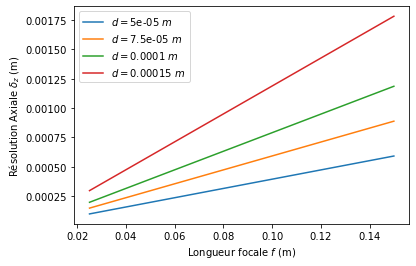

In [9]:
plt.figure()
for i in range(len(pinhole_sizes)):
    plt.plot(f, every_dofs[i], label=f'$d = ${pinhole_sizes[i]} $m$')
plt.xlabel('Longueur focale $f$ (m)')
plt.ylabel('Résolution Axiale $\delta_z$ (m)')
plt.legend()

### 2.3 Graphique 3: $L$ vs $\delta_z$ pour $d$ = 75mm et $f_1=f_2=$ 25, 35, 50, 100 et 150 mm

In [10]:
f = [25e-3,35e-3,45e-3,55e-3,75e-3]  # [m]
pinhole_size = 75.0e-6 # [m]
dofs = []
L = [15e-3,25e-3,35e-3,45e-3] # [m]
every_dofs = []
for i in range(len(f)):
    dofs = []
    for j in range(len(L)):
        # On calculate la résolution axiale
        dof = compute_dof(f[i], L[j], pinhole_size)
        # On ajoute la résolution axiale à une liste contenant les différentes résolutions axiales
        dofs.append(dof)
    # On ajoute les dofs pour une distance d à une liste storant les dofs pour les différents d
    every_dofs.append(dofs)

[0.000266541538029637, 0.000266539921813594, 0.000266538536500951, 0.000266537382084542]


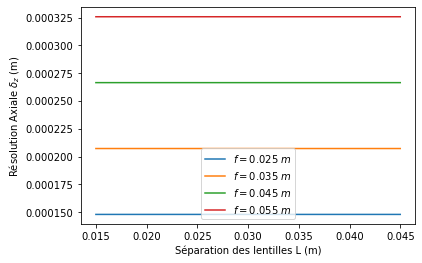

In [11]:
plt.figure()
for i in range(len(L)):
    plt.plot(L, every_dofs[i], label=f'$f = ${f[i]} $m$')
plt.xlabel('Séparation des lentilles L (m)')
plt.ylabel('Résolution Axiale $\delta_z$ (m)')
plt.legend(loc='best')

print(every_dofs[2])

In [12]:
x = sp.symbols('x')
Mtot = Mtrans(5.5)@Mlens(5)@Mtrans(20)@Mlens(50)@Mtrans(x)@Mlens(-15)@Mtrans(20)@Mlens(5)@Mtrans(15)
print(Mtot)

[[0.068*x - 0.889999999999999 0.623333333333334*x - 8.58333333333333]
 [0.056*x + 1.62 0.513333333333333*x + 14.5]]


In [13]:
B = Mtot[0, 1]
# On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
x1 = sp.solve(B)[0]
# On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
x2 = 0.068*x1 - 0.88999999999
print(x1, x2)

13.7700534759358 0.0463636363736354
